# Natural Language Toolkit (NLTK)
### Natural Language Processing with Python
**Author**: Maxim Shelepov

**Course**: CSC295

**Date**: 04/23/24

## Introduction

### General Purpose
> "NLTK is a leading platform for building Python programs to work with human language data."
> 
> \- www.nltk.org

**What is it for?** The package serves as a toolbox (i.e. in the form of functions, classes, and submodules) to clean, process, organize, and finally analyze linguistic data to its core [[1]](#references).

**What does it have?** The package contains data cleaning and processing submodules tasked primarily with [[2]](#references):
- Tokenization: restructuring text into tokens (words or sentences).
- Filtering: removing grammatical words, also called "stop words".
- Stemming and lemmatization: extracting base or root forms of a words to retain their essential meaning while removing unnecessary details.
- Tagging: classifying words into their part-of-speech categories (i.e. noun, verb, adjective, etc).

In terms of classification and analysis of text:
- Ships with a pre-trained sentiment analysis model which can be used to analyze a given text on its positive, negative, or neutral linguistic quality.
- Named-entity recognition for extracting known entities from text.

Additional niceties:
- Wrappers to popular scikitlearn classifiers (NaiveBayes, SVM, Linear Reg., etc).
- Graph and tree visualizations of linguistic data.

For everything that the NLTK package offers check the [nltk module index page](https://www.nltk.org/py-modindex.html).

### Created
2001 in the Department of Computer and Information Science at University of Pennsylvania. [Read more about it](https://www.nltk.org/book_1ed/ch00.html#:~:text=NLTK%20was%20originally%20created%20in,help%20of%20dozens%20of%20contributors.).

### Current Version

#### 3.8.1 (Jan 02, 2023)
The version is consistent with the most updated version of the module on github and PyPi (The Python Package Index) where you can install it.
- [PyPi installation instructions](https://pypi.org/project/nltk/).
- [Package Github](https://github.com/nltk/nltk/tree/3.8.1).

To install popular NLTK datasets and models check out https://www.nltk.org/install.html#installing-nltk-data.

### Similar Packages
While NLTK is most widely known and popular in the academic space, the spaCy natural language processing library is also another popular alternative for the industry. Coming in strong as a strong second, the package is faster and more optimized for specific tasks. The sPacy package also features the use of neural networks for training some of the models. It is also MIT licensed (open source) so you can integrate your own changes and customizations as a company engineer. Whereas NLTK has greater customization options, sPacy is simpler to use but less configurable. Other options are NLP toolkit, gensim, Pattern, and Polyglot [[3]](#references).

### Package Companions
The package contains wrappers for classifiers found in the [scikitlearn](https://scikit-learn.org/stable/) machine learning package. Also integrated well with the [Pandas data library](https://pandas.pydata.org). As mentioned in a previous section, the scikitlearn can be used to train the included sentiment analysis model or any other textual model you create. Pandas dataframes are useful for structuring the textual data.

In the demonstration below the Selenium and BeautifulSoup4 packages are used to collect text information from the web and serve well as package companions.

### Environment Requirements
The NLTK module supports Python versions 3.7-3.11. The anaconda or python environment will suffice.

## Finding a dream internship with NLTK Demo
#### Sections
1. [Scrapping job posts from indeed.com.](#scrapping-jobs-from-indeed)
2. [Analysis of job descriptions.](#analysis-of-job-descriptions)
3. [Sentiment Analysis with VADER.](#sentiment-analysis)
4. [Formatting and results to external file.](#recording-results)

In [59]:
# import the package.
import nltk

In [ ]:
# download some general models and helpful lexical data.
nltk.download(["names", "stopwords", "vader_lexicon", "averaged_perceptron_tagger", "maxent_ne_chunker", "words", "punkt", "wordnet"])

### Scrapping jobs from indeed
#### aka collecting natural language to analyze.
Before beginning analysis, lets grab the top 10 hits matching the search result "Data Science Intern" on Indeed.com.

For this step, we will use the popular [bs4](https://beautiful-soup-4.readthedocs.io/en/latest/) and [selenium](https://www.selenium.dev) scrapping and automation packages to help.

*Note: Indeed.com is very good at blocking api scrapping requests, so have to use selenium.*

In [61]:
# importing scrapping toolkit.
from bs4 import BeautifulSoup as Bs4
from selenium import webdriver
from pprint import pprint

In [63]:
# Using some web scraping to gather the top x results.

TOP_HITS = 10

# General page.
# https://www.indeed.com/jobs?q=data+scientist+intern&l=North+Carolina&vjk=2dc40f5c7b8b8c33
base_url = "https://www.indeed.com"
jobs_path = "jobs"
search_q = "data+scientist+intern"
loc_q = "North+Carolina"

# Single page.
# https://www.indeed.com/viewjob?jk=2dc40f5c7b8b8c33
single_job_path = "viewjob"

# Trying something else with selenium via browser.
driver = webdriver.Safari()
driver.get(f"{base_url}/{jobs_path}?q={search_q}&l={loc_q}/headers")
with open("indeed_jobs.html", "w") as outfile:
    outfile.write(driver.page_source)

# Reading content.
with open("indeed_jobs.html", "r") as infile:
    html_text = infile.read()

html_parser = Bs4(html_text, "html.parser")
job_cards = html_parser.find(id="mosaic-provider-jobcards").find("ul").find_all("li", class_="eu4oa1w0", limit=TOP_HITS + 1)

jobs_data = []
for jc in job_cards:
    if jc != None and jc.a != None:
        key = jc.a["data-jk"]
        driver.get(f"{base_url}/{single_job_path}?jk={key}")
        job_source = driver.page_source

        job_parser = Bs4(job_source, "html.parser")
        jobs_data.append({
            "title": job_parser.find("h1", class_="jobsearch-JobInfoHeader-title").get_text(),
            "description": job_parser.find("div", id="jobDescriptionText").get_text(),
        })

driver.close()

pprint(jobs_data[:3])

[{'description': '\n'
                 'Who are you?\n'
                 " Simply put, you're a highly analytical thinker who's "
                 'passionate about travel and supporting local businesses. You '
                 "love discovering new places, and you're excited to join our "
                 'mission of supporting businesses globally through the power '
                 "of sharing. You're a bit of a food and drink aficionado, and "
                 "you're ready to make an impact on a global scale by helping "
                 'to support our Data Science Org. Sound like you? Then read '
                 "on, friend, and let's get to it!\n"
                 ' About the Role:\n'
                 ' Atmosfy is seeking a highly Data Science intern to work '
                 'directly with the Data Science and Product Analytics team. '
                 'This position will work closely with Growth Leads and '
                 'Product Leads to analyze and optimize the user ex

The job posts are stored in a list data structure which contains model-like dictionary objects ([MVC architecture](https://en.wikipedia.org/wiki/Model–view–controller)).
Local directory file is used to store the html to reduce request to indeed.

### Analysis of job descriptions

##### Step #1:
Tokenize each job description to analyze at a more granular scale. The tokenization can either be "by word" or "by sentence". Still working with the job models in a list structure so will make an attribute to store the tokens.

In [64]:
# Tokenizing job descriptions.
for job in jobs_data:
    tokens = nltk.tokenize.word_tokenize(job['description'])
    job['tokens'] = tokens

jobs_data[0]['tokens'][:10] # showing only the first.

['Who', 'are', 'you', '?', 'Simply', 'put', ',', 'you', "'re", 'a']

##### Step #2:
Cleaning the text data by removing unnecessary tokens which only clutter the data pool. These words are contained in NLTK's stopword database which was downloaded in an earlier code block. Solo characters and non-alphanumeric character sequences were also removed.

In [65]:
from nltk.corpus import stopwords

# Cleaning.
stop_words = set(stopwords.words("english"))
for job in jobs_data:
    tokens = job['tokens']
    job['relevant_tokens'] = [token for token in tokens if token.casefold() not in stop_words and token.isalnum() and len(token) > 1]

jobs_data[0]['relevant_tokens'][:10]

['Simply',
 'put',
 'highly',
 'analytical',
 'thinker',
 'passionate',
 'travel',
 'supporting',
 'local',
 'businesses']

##### Step #3:
Deconstructing words to their root meanings making it easier to compare to lexical databases and perform analysis overall. Remember string comparisons are case sensitive.

May notice an issue in this step. The lemmatization performs the token deconstruction only in the case of a word match with the "word" database downloaded previously. Most words in the job description remain unchanged, as can be seen below.

In [66]:
from nltk.stem import WordNetLemmatizer

# Lemmatization.
lemmatizer = WordNetLemmatizer()

for job in jobs_data:
    job['lemmatized_tokens'] = [lemmatizer.lemmatize(token) for token in job['relevant_tokens']]

jobs_data[0]['lemmatized_tokens'][:10]

['Simply',
 'put',
 'highly',
 'analytical',
 'thinker',
 'passionate',
 'travel',
 'supporting',
 'local',
 'business']

##### Step #4:
Tagging each token (word) by their part-of-speech category to extract important terms in the form of nouns: qualifications, locations, skills, etc...

In [67]:
# Part-of-speech tagging.

for job in jobs_data:
    job['tagged_tokens'] = nltk.pos_tag(job['lemmatized_tokens'])

jobs_data[0]['tagged_tokens'][:5] # NN is a noun, NNP is a proper noun.

[('Simply', 'NNP'),
 ('put', 'VBD'),
 ('highly', 'RB'),
 ('analytical', 'JJ'),
 ('thinker', 'NN')]

##### Step #5:
Using NLTK's frequency distribution capabilities to find the most frequent words that match the "NN", "VB", "JJ" part-of-speech tags. In other words, finding the most frequent nouns, verbs, and adjectives.

In [84]:
from nltk import FreqDist

# Visualizing top nouns and their adjectives.
for job in jobs_data:
    nouns = [tag[0] for tag in job['tagged_tokens'] if tag[1] == "NN"]
    verbs = [tag[0] for tag in job['tagged_tokens'] if tag[1] == "VB"]
    adjectives = [tag[0] for tag in job['tagged_tokens'] if tag[1] == "JJ"]
    freq_dist = FreqDist(nouns)
    freq_dist2 = FreqDist(verbs)
    freq_dist3 = FreqDist(adjectives)
    job['frequent_nouns'] = [pair[0] for pair in freq_dist.most_common(20)]
    job['frequent_verbs'] = [pair[0] for pair in freq_dist2.most_common(20)]
    job['frequent_adjectives'] = [pair[0] for pair in freq_dist3.most_common(20)]

print(jobs_data[0]['frequent_nouns'][:5])
print(jobs_data[0]['frequent_verbs'][:5])
print(jobs_data[0]['frequent_adjectives'][:5])

['work', 'experience', 'business', 'team', 'product']
['drink', 'make', 'let', 'get', 'optimize']
['local', 'new', 'global', 'analytical', 'user']


##### Step #6:
This step is just for additional insight to see how the most common nouns are distributed in the text. The dispersion plot plots the nouns on the y-axis and the offset from the beginning on the x-axis.

From the dispersion plot there seems to be no apparent concentration of most frequent words and they seem spread relatively uniformly.

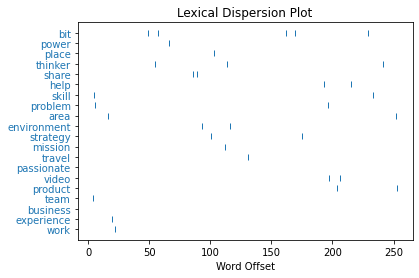

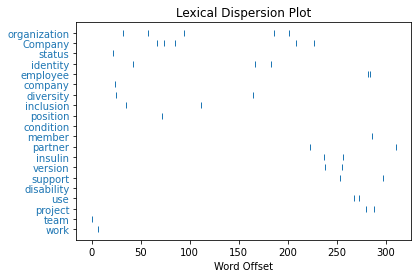

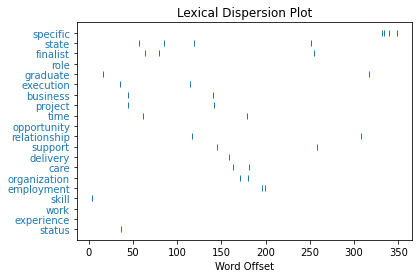

In [83]:
# Dispersion plot for top nouns in the first 3 jobs.
for job in jobs_data[:3]:
    # dispersion of top 3 nouns.
    text = nltk.Text(job['relevant_tokens']) # converting to your corpus.
    text.dispersion_plot(job['frequent_nouns'])

##### Step #7:
This is another visualization step, not necessarily for recording results, but mostly for analysis. Here the intersectional relationship between the most frequent nouns, verbs, and adjectives is displayed in tree form [[4]](#references).

The tree is wide, so scroll horizontally on the figure to see the center and far right side of the tree.

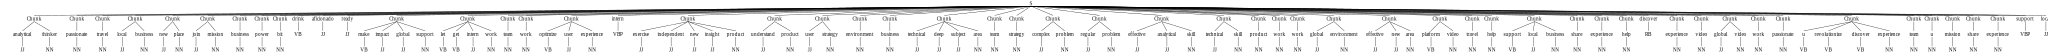

In [70]:
# grabbing nouns and surrounding adjectives for context.
pattern = "Chunk: {<VB>*<JJ>*<NN>}"

chunk_parser = nltk.RegexpParser(pattern)
for job in jobs_data:
    tagged_intersection = list(filter(
        lambda tag: tag[0] in job['frequent_nouns'] or tag[0] in job['frequent_adjectives'] or tag[0] in job['frequent_verbs'], job['tagged_tokens']
    ))
    job['frequent_nouns_context'] = chunk_parser.parse(tagged_intersection)

# tree with a combination of the most frequent nouns, adjectives, and verbs.
jobs_data[0]['frequent_nouns_context']

##### Step #8:
Now performing a similar manipulation with NLTK's in-built collocations function. The function finds the most frequent two-word phrases and allows to store the representation in a list for each job.

In [71]:
# Collocation.
# Word sequences that occur often.
for job in jobs_data:
    text = nltk.Text(job['lemmatized_tokens'])
    job['frequent_phrases'] = [f"{phrase[0]} {phrase[1]}" for phrase in text.collocation_list(15)]

jobs_data[0]['frequent_phrases']


['Data Science',
 'share experience',
 'support local',
 'business globally',
 'local business']

### Sentiment Analysis

##### What does NLTK's Sentiment Analysis do under the hood?
NLTK sentiment analysis uses their VADER model to generate a score of how positive, negative, or neutral the string is. Each word token in the provided string is classified as either positive, negative, or either and by some calculation sums to the total sentiment score [[5]](#references).

In [72]:
# Sentiment analysis for job posting.
from nltk.sentiment import SentimentIntensityAnalyzer

# Lets check for the first one to get a feel...
sia = SentimentIntensityAnalyzer()
sample_sentiment = sia.polarity_scores(jobs_data[0]['description']) # seems not too far fetched, mostly neutral.
print(sample_sentiment)

# Recording for all jobs.
for job in jobs_data:
    job['sentiment'] = sia.polarity_scores(job['description'])

{'neg': 0.017, 'neu': 0.75, 'pos': 0.232, 'compound': 0.9986}


##### Summarizing texts using NLTK
The model behind text summarization is not native to NLTK, however, it does provide an easy way to tokenize the text and perform frequency distribution for each word. The resulting summarized string is a collection of string with the most frequent words. Below the top 5 highest rated sentences are shown for a job posting [[6]](#references).

In [73]:
# Summarizing the original descriptions (so its easier to glance at).
# Citation: Educative.io Izra Muzzafar similar implementation [5].

for job in jobs_data:
    freq = nltk.FreqDist(job['relevant_tokens'])
    sentence_tokens = nltk.sent_tokenize(job['description'])

    scores = {}
    for sent_token in sentence_tokens:
        for word_token in nltk.word_tokenize(sent_token):
            if word_token in scores:
                scores[sent_token] += freq[word_token]
            else:
                scores[sent_token] = freq[word_token]

    top5 = sorted(scores.items(), key=lambda s: s[1], reverse=True)[:5]
    job['summary'] = "".join([sent[0] for sent in top5])

jobs_data[0]['summary']

"\nWho are you?Simply put, you're a highly analytical thinker who's passionate about travel and supporting local businesses.You love discovering new places, and you're excited to join our mission of supporting businesses globally through the power of sharing.You're a bit of a food and drink aficionado, and you're ready to make an impact on a global scale by helping to support our Data Science Org.Sound like you?"

### Recording results

To preserve are results for further human analysis the results are exported to an external simple text file. NLTK is powerful tool for text analysis, however, human intervention for the most part is still required. As machines may evaluate the principle characteristics of text while humans can make more critical judgement calls.

In [82]:
# Exporting to a file for final decision.

with open("analysis.txt", "w") as outfile:
    outfile.write(f"ANALYSIS OF {TOP_HITS} JOB POSTINGS\nResult from {base_url} for query: {search_q}\n\n")
    for job in jobs_data:
        outfile.write(f"{'-' * 100}\n")
        outfile.write(f">> {job['title'].strip()}\nSUMMARY:\n{job['summary'].strip()}\n")
        outfile.write(f"FREQUENT TWO-WORD PHRASES:\n")
        for phrase in job['frequent_phrases']:
            outfile.write(f"- {phrase}\n")
        outfile.write(f"SENTIMENT:\n{job['sentiment']}\n")
        outfile.write(f"{'-' * 100}\n\n")

## Package Review

### Advantages
- A lot of room for customization and intersections with many other libraries (selenium, bs4, scikitlearn, etc.).
- A lot of documentation and in-depth book on how to maximize the capabilities of the package.
- Best for text deconstruction, categorization, and organization.

### Disadvantages
- Steep learning curve. To utilize most of the package capabilities requires some more advanced linguistic understanding.
- The out-of-box functions provided by NLTK are "good enough" but for the most part a lot of code and data manipulation is required to achieve good results with specifically your natural language data.
- The package mainly provides string deconstruction functions and for the most part does not perform any more advanced token classifications which would have been useful in the job description but is rather code intensive.

### Challenges
- The out-of-box database of words is not representitive of most textual data and is rather limited. An example of this was seen in the lemmatization step where the words were unmodified due to missing representation in NLTK word database.
- Documentation is plentiful but rather difficult to scan through quickly.

### Bugs
No bugs were observed and the package was able to perform as advertised.

### Best Suited For
NLTK is best suited for text simplification and organizing text features for machine learning. 

## References
[1] J. Jablonski, “Natural Language Processing With Python’s NLTK Package – Real Python,” realpython.com, May 05, 2021. https://realpython.com/nltk-nlp-python/ (accessed Apr. 20, 2024).

[2] T. Aarsen, “Natural Language Toolkit — NLTK 3.4.5 documentation,” Nltk.org, 2009. https://www.nltk.org (accessed Apr. 20, 2024).

[3] I. Bobriakov, “Comparison of Top 6 Python NLP Libraries,” Medium, Jul. 14, 2018. https://medium.com/activewizards-machine-learning-company/comparison-of-top-6-python-nlp-libraries-c4ce160237eb (accessed Apr. 20, 2024).

[4] S. Bird, “NLTK Book,” www.nltk.org. https://www.nltk.org/book (accessed Apr. 23, 2024).[5]M. Mogyorosi, “Sentiment Analysis: First Steps With Python’s NLTK Library – Real Python,” realpython.com, Jan. 13, 2021. https://realpython.com/python-nltk-sentiment-analysis/ (accessed Apr. 20, 2024).

[6] I. Muzaffar, “Text Summarization in spaCy and NLTK,” Educative. https://www.educative.io/answers/text-summarization-in-spacy-and-nltk (accessed Apr. 20, 2024).

[7] Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model forSentiment Analysis of Social Media Text. Eighth International Conference onWeblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. 